# Model Trial #4
## Purpose: 
The purpose of this trial will be to explore the potential of machine learning to predict deaths based on population density and other information related to population size. Additionally, information from states containing vaccinations was purposely withheld in order to assess its influences of the predictive abilites of the model. 

- This Trial will also avoid using the StandardScaler in order to remedy the errors of the first trial.
- This trial will assess the importance of certain features in attempt to improve the model's accuracy.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt

In [4]:
#Creating a DataFrame using the read_excel function from pandas
df = pd.read_csv("/Users/origi/Documents/Data Bootcamp/Final Challenge/Research Data/final_covid19.csv")

#Showing all 50 points of data from the DataFrame
df.head(50)

,state,infected,deaths,population,pop_density,gini,icu_beds,unemployment,hospitals,health_spending,pollution,Med-large_airports,total_vaccines_administered,recipients_one_dose,fully_vaccinated
0,Alabama,1511092,20321,4908621,96.9221,0.4847,1533,2.7,101,7281,8.1,1.0,"6,087,103","3,031,464","2,459,363"
1,Alaska,302448,1321,734002,1.2863,0.4081,119,5.8,21,11064,6.4,1.0,"1,093,808","500,864","445,530"
2,Arizona,2264159,31244,7378494,64.9550,0.4713,1559,4.5,83,6452,9.7,1.0,"11,508,661","5,191,587","4,364,444"
3,Arkansas,943944,11970,3038999,58.4030,0.4719,732,3.5,88,7408,7.1,0.0,"4,081,816","1,981,905","1,612,690"
4,California,11171759,95620,39937489,256.3727,0.4899,7338,3.9,359,7549,12.8,9.0,"71,306,336","32,284,670","27,773,615"
5,Colorado,1649212,13426,5845526,56.4011,0.4586,1597,2.5,89,6804,6.7,1.0,"10,299,034","4,507,596","3,980,992"
6,Connecticut,885767,11317,3563077,735.8689,0.4945,674,3.8,32,9859,7.2,1.0,"7,277,732","3,345,245","2,771,081"
7,Delaware,305284,3080,982895,504.3073,0.4522,186,3.9,7,10254,8.3,0.0,"1,729,273","794,932","656,886"
8,Florida,7082717,80647,21992985,410.1256,0.4852,5604,2.8,217,8076,7.4,7.0,"36,035,360","16,742,736","14,140,484"
9,Georgia,2809555,38468,10736059,186.6719,0.4813,2508,3.1,145,6587,8.3,1.0,"14,324,212","6,823,694","5,684,843"


In [5]:
# Setting the State name as the index and data types since new data was imported
s_df = df.set_index('state')
s_df.index.name = "State"
s_df.dtypes

infected                         int64
deaths                           int64
population                       int64
pop_density                    float64
gini                           float64
icu_beds                         int64
unemployment                   float64
hospitals                        int64
health_spending                  int64
pollution                      float64
Med-large_airports             float64
total_vaccines_administered     object
recipients_one_dose             object
fully_vaccinated                object
dtype: object

 **Note**:
As can be seen above, there are no string values that need to be converted into numerical values. However, there are commas separating the thousands place in the newly imported vaccination data. Therefore, the next step can only be proceeded once this is dealt with; the next step will involve creating the features and target.

In [6]:
# Preprocessing the data
Total_Vaccines = [int(i.replace(',','')) for i in df.total_vaccines_administered]
One_Dose = [int(i.replace(',','')) for i in df.recipients_one_dose]
GPS_Complete = [int(i.replace(',','')) for i in df.fully_vaccinated]
# print(Total_Vaccines, One_Dose, GPS_Complete) # Checking that the data was processed properly

# Creating series so that the vaccine data can be re-added to the main DataFrame
Tot_vax = pd.Series(Total_Vaccines)
One_dose = pd.Series(One_Dose)
Fully_vax = pd.Series(GPS_Complete)

# Adding the processed data back to the DataFrame and dropping the old columns
s_df["Total Vaccines Administered "] = Tot_vax.values
s_df["Partially Vaccinated"] = One_dose.values
s_df["Fully Vaccinated"] = Fully_vax.values
s_df.drop('total_vaccines_administered', axis=1, inplace=True)
s_df.drop('recipients_one_dose', axis=1, inplace=True)
s_df.drop('fully_vaccinated', axis=1, inplace=True)
s_df.dtypes

infected                          int64
deaths                            int64
population                        int64
pop_density                     float64
gini                            float64
icu_beds                          int64
unemployment                    float64
hospitals                         int64
health_spending                   int64
pollution                       float64
Med-large_airports              float64
Total Vaccines Administered       int64
Partially Vaccinated              int64
Fully Vaccinated                  int64
dtype: object

In [7]:
# Creating the DataFrame that contains the desired features
X = s_df.drop(columns="deaths")

# Creating the DataFrame that contains the desired target
y = pd.DataFrame(s_df["deaths"])


In [8]:
# Inspecting the dataset's statistical information. 
X.describe()

,infected,population,pop_density,gini,icu_beds,unemployment,hospitals,health_spending,pollution,Med-large_airports,Total Vaccines Administered,Partially Vaccinated,Fully Vaccinated
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.880679e+06,6.611966e+06,203.900898,0.464648,1489.460000,3.482000,103.760000,8259.92000,7.366000,1.240000,1.081412e+07,4.962015e+06,4.219923e+06
std,2.124986e+06,7.480025e+06,267.412842,0.021015,1569.200033,0.803739,88.799375,1157.62658,1.431513,1.767738,1.286030e+07,5.887942e+06,5.017832e+06
min,1.412820e+05,5.670250e+05,1.286300,0.406300,94.000000,2.200000,7.000000,5982.00000,4.400000,0.000000,7.300020e+05,3.353480e+05,2.925550e+05
25%,5.491758e+05,1.857760e+06,47.706725,0.451975,365.000000,2.825000,46.250000,7381.00000,6.625000,0.000000,2.867728e+06,1.371978e+06,1.120493e+06
50%,1.341654e+06,4.572438e+06,107.783600,0.467350,1146.500000,3.400000,90.500000,8091.50000,7.400000,1.000000,6.780690e+06,3.136708e+06,2.644973e+06
75%,2.214602e+06,7.692445e+06,219.566500,0.478900,1851.250000,3.800000,130.750000,8917.50000,8.100000,1.000000,1.413467e+07,6.462332e+06,5.410640e+06
max,1.117176e+07,3.993749e+07,1215.199100,0.522900,7338.000000,5.800000,523.000000,11064.00000,12.800000,9.000000,7.130634e+07,3.228467e+07,2.777362e+07


**Note**: As observed from the cell above, the variation between the columns/features is indeed large. This could have an affect on the end results and predictive abilities of the model. However, the features will not be scaled.

### Splitting into Train and Test sets

Now that both the features and target have been inspected, it is time to split the data into training and test sets. 

In [9]:
X_train = X.loc[["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]]
X_test = X.loc[["Utah", "Oregon", "Connecticut"]]
y_train = y.loc[["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"], ["deaths"]]
y_test = y.loc[["Utah", "Oregon", "Connecticut"],["deaths"]]

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [11]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [12]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitting the model
By this point, the data has been split into training and test sets. Thus, the model is ready to be fit to the training data.
- This trial avoids using the StandardScalar despite knowing the risk of certain features having larger biases that may be overwhelming when compared to the biases of other features; ultimately affecting the model and its predictive accurary. 

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Testing the model
The model has been fitted to the data. It's ready for death predictions. 

In [14]:
# Make a prediction
y_pred = model.predict(X_test)
y_pred

array([[ 3676.62848941],
       [ 5496.58441079],
       [10193.20055862]])

In [47]:
# Showing the predicted outputs
for i in range(len(X_test_scaled)):
    index = ['Utah', 'Oregon', 'Connecticut']
    print("Predicted deaths for " +index[i]+ "= %3d" % y_pred[i][0])

Predicted deaths for Utah= 3676
Predicted deaths for Oregon= 5496
Predicted deaths for Connecticut= 10193


### Assessing Feature importance 
After running the model and producing results, it's time to assess which of the features has the greatest impact towards the model's accuracy and increases losses.

Feature: 0, Score: 0.00498
Feature: 1, Score: -0.00028
Feature: 2, Score: 4.43154
Feature: 3, Score: 18778.56935
Feature: 4, Score: 11.65694
Feature: 5, Score: 1592.45517
Feature: 6, Score: 1.77651
Feature: 7, Score: -0.47721
Feature: 8, Score: -1377.88056
Feature: 9, Score: -2352.82266
Feature: 10, Score: -0.00210
Feature: 11, Score: 0.00085
Feature: 12, Score: 0.00435


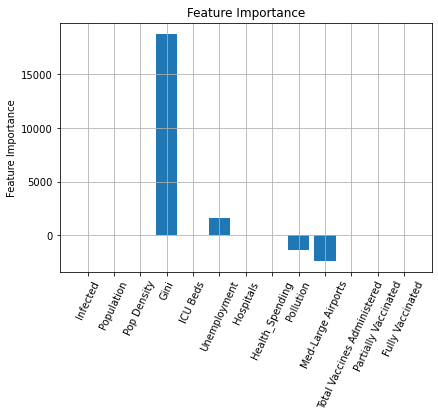

In [52]:
# Creating the variable that obtains the feature's importance to the model
importance = model.coef_

# The importance results are held within an array, array[0] accesses the first and only value which in this case is the list desired
Corrected_importance = importance[0]

# Summarizing the feature's importance
for i,v in enumerate(Corrected_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plotting feature importance
plt.bar([x for x in range(len(Corrected_importance))], Corrected_importance)
plt.grid()
plt.tight_layout()
ind = np.arange(len(X.columns)) # Setting the locations for xticks
plt.xticks(ind,("Infected", "Population", "Pop Density", "Gini", "ICU Beds", "Unemployment", "Hospitals", "Health_Spending", "Pollution", "Med-Large Airports", "Total Vaccines Administered", "Partially Vaccinated", "Fully Vaccinated"), rotation=65)
plt.title("Feature Importance")
plt.ylabel("Feature Importance")
plt.show()

**Note**: Looking at the feature importance results, it seems that the "Gini" column is having a significant impact on the models predictive abilites and creating an immense bias. Others like the "Pollution" and "Med-Large Airports" are also having impact, but not as large as the "Gini" column. After careful review, it seems that the columns with the lowest amount of deviation are creating the biggest biases. These columns are probably contributing to the most losses and will most likely be removed in the fifth trial. 

### Results
The models results will now be tested for accuracy

In [ ]:
# Setting up the data for analysis
Column_names = ['Predicted', 'Actual', 'State']
results = pd.DataFrame(y_pred)
results["test"] = y_test["deaths"].values
results["state"] = ['Utah', 'Oregon', 'Connecticut']
results.set_axis(Column_names, axis=1, inplace=True)

# Setting the State name as the index
y_results = results.set_index('State')
y_results.head()

In [ ]:
# Accuracy Calculations
realVals = y_results.Actual
predictedVals = y_results.Predicted

# Empty arrays holding the error data
abs_error_array = []
rel_error_array = []
per_error_array = []

# For loop that calculates the results for each state
for i in range(len(y_results)):
    abs_error_calc = round(abs(realVals[i] - predictedVals[i]))
    rel_error_calc = round(abs(((realVals[i] - predictedVals[i])/realVals[i])), 2)
    percent_error_calc = round(abs(((realVals[i] - predictedVals[i])/realVals[i])*100))
    std_calc = round(np.std([realVals[i], predictedVals[i]]))
    abs_error_array.append(abs_error_calc)
    rel_error_array.append(rel_error_calc)
    per_error_array.append(percent_error_calc)
    
# Creating series so that the errors can be added to the main DataFrame
abs_error = pd.Series(abs_error_array)
rel_error = pd.Series(rel_error_array)
per_error = pd.Series(per_error_array)

The metrics that were evaluated to test the model's accuracy are: Absolute Error, Relative Error, and Percent Error.

$\text{Absolute Error} = |V_{A} - V_{P}|$

$\text{Relative Error} = |\frac{V_{A} - V_{P}}{V_{A}}|$

$\text{Percent Error} = |\frac{V_{A} - V_{P}}{V_{A}}|*100\%$

$\text{Nomenclature}:$
- $V_{A} = \text{Acutal/Measured Value}$
- $V_{P} = \text{Predicted/Model Value}$

In [ ]:
# Adding the calculations to the results DataFrame
y_results["Absolute Error"] = abs_error.values
y_results["Relative Error"] = rel_error.values
y_results["Percent Error"] = per_error.values
y_results

In [ ]:
# Formatting the DataFrame 
y_results["Predicted"] = y_results["Predicted"].map("{:.0f}".format)
y_results["Actual"] = y_results["Actual"]
y_results["Absolute Error"] = y_results["Absolute Error"]
y_results["Relative Error"] = y_results["Relative Error"]
y_results["Percent Error"] = y_results["Percent Error"]
y_results

# Creating the output file (CSV)
output_data_file = "/Users/origi/Documents/Data Bootcamp/Final Challenge/Final Challenge Code/Trail_3_results.csv"
# Exporting the results into a CSV.
y_results.to_csv(output_data_file)

### Conclusion
The model produced average results once again; the predictive accuray of the model is hovering around 74% (Utah), 65% (Oregon), and 90% (Connecticut). The analytics metrics utilized demonstrate that error is still quite significant for states like Oregon. The model is underestimating the amount of deaths for all of the tested states, but not as severely for Utah and Connecticut. Curiousity brings forth the following questions again: 
- Will the model always underestimate the actual amount of deaths due to COVID 19? If so, can a correction factor be implemented and will the implementation of these correction factor(s) be dependent on unique features of a state(s)? 
- Can the model's accuracy be improved by increasing the amount of data provided such as vaccinations information? 

The results from this trial remained the same as in **Model Trial #3**. The reason for this trial was to assess feature importance to further improve the model's accuracy. Using the information gathered from this trial, the following columns will be dropped in attempt to optimize the model again: "Gini", "Pollution", "Med-Large Airports", and others with similar statistics (STDEV). This will be done in conjunction with the analysis of the influence of population density by adding the following states to the testing data rather than the training data: "Maine", "Maryland", and "Massachusetts". The reason for choosing Maine is due its similar population density to those of Utah and Oregon. Maryland and Massachusetts were chosen due to their similar population density to that of Connecticut. 